# Ridge regression

In [1]:
# The basics
import numpy as np
import pandas as pd

# Cross validation and model selection
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV

# Plotting
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import matplotlib.pylab as pl
import matplotlib as mpl
import matplotlib.lines as mlines
import matplotlib.transforms as mtransforms
import matplotlib.ticker as ticker
mpl.rc('font',family='Helvetica')
from plot_actual_vs_pred import plot_actual_vs_pred  # ad hoc

# Models
from sklearn.multioutput import MultiOutputRegressor
from sklearn.linear_model import Ridge

In [2]:
# Reading data
sensor = pd.read_csv('../../data/scaled_sensor1.csv')
sensor.head(10)

,NO,NO2,NH3,0.05-1-slope-0,0.05-1-slope-1,0.05-1-slope-2,0.05-1-slope-3,0.05-1-slope-4,0.05-1-slope-5,0.05-1-slope-6,...,2500.0-1-avg-230,2500.0-1-avg-231,5000.0-1-avg-232,5000.0-1-avg-233,5000.0-1-avg-234,5000.0-1-avg-235,5000.0-1-avg-236,5000.0-1-avg-237,5000.0-1-avg-238,5000.0-1-avg-239
0,10.0,5.0,20.0,2.075233,-2.132975,-0.890647,-0.759649,-0.229623,1.159038,0.574001,...,2.236646,2.285081,2.283338,2.230864,2.260481,2.250973,2.280105,2.208683,2.246311,2.266193
1,10.0,5.0,20.0,-0.794557,0.775893,-0.043459,-0.235769,-0.901168,1.501477,-1.673392,...,2.271940,2.332051,2.283338,2.378923,2.331521,2.309002,2.344988,2.273618,2.325937,2.311393
2,10.0,5.0,20.0,0.211285,0.222391,0.110576,-0.759649,1.288653,-2.078574,1.572843,...,2.358215,2.326179,2.253807,2.313777,2.325601,2.327689,2.339089,2.350359,2.379021,2.366420
3,10.0,5.0,20.0,-1.119578,0.937165,-0.120476,0.392887,-0.112832,-0.833339,0.074581,...,2.371941,2.367278,2.460524,2.408535,2.378882,2.386701,2.344988,2.404963,2.426206,2.366420
4,20.0,40.0,40.0,1.890562,-1.943829,-1.275732,-2.121738,-0.813575,-1.538972,-0.216748,...,1.983704,1.944547,1.970311,2.011737,1.952639,1.926404,1.937998,1.937138,1.966145,1.941930
5,20.0,40.0,40.0,0.232215,0.196508,-1.352750,0.078559,-0.930365,0.660944,-0.799406,...,1.954292,1.920083,1.965881,1.911056,1.917119,1.950009,1.973389,1.984363,1.977942,2.000887
6,20.0,40.0,40.0,-0.391358,0.511254,-1.680072,0.602439,-0.346413,-0.210721,-0.050275,...,1.960174,1.862349,1.893530,1.899212,1.971879,1.938207,1.937998,1.960751,1.989738,1.959617
7,20.0,40.0,40.0,-0.111274,0.351807,-0.582578,-0.445321,-0.112832,0.660944,0.074581,...,1.971939,1.921062,1.988029,1.964358,1.982239,1.973614,1.926201,1.996170,1.972043,2.018574
8,40.0,40.0,80.0,1.628329,-1.834323,-0.890647,-1.702633,1.171863,-1.206909,0.199436,...,1.936645,1.891706,1.940780,1.970280,1.899359,1.979515,1.991084,1.960751,1.954349,1.924242
9,40.0,40.0,80.0,-0.861039,0.761956,-0.274510,-0.654873,-0.346413,1.159038,-0.424840,...,1.966056,2.025277,1.964404,1.946591,1.970399,1.944108,1.943897,1.966654,1.973518,1.983199


In [3]:
# Separating dependent and independent variables Y and X:
X = np.array(sensor.iloc[:, 3:])
Y = np.array(sensor.iloc[:, :3])
X, X_val, Y, Y_val = train_test_split(X, Y, test_size=0.2, random_state=42)

In [4]:
from sklearn.preprocessing import StandardScaler
steps = [
         ('scaler', StandardScaler()),
         ('ridge', Ridge())
        ]
n_alphas = 1000
alphas = np.logspace(-10, 4, n_alphas)

params = [{'ridge__alpha': alphas}]

pipe = Pipeline(steps)

grid_search = GridSearchCV(pipe,
                           params,
                           scoring = 'neg_root_mean_squared_error',
                           return_train_score=True
                          )

grid_search.fit(X, Y)
best_params = grid_search.best_params_
best_score = grid_search.best_score_

In [5]:
best_params

{'ridge__alpha': 10000.0}

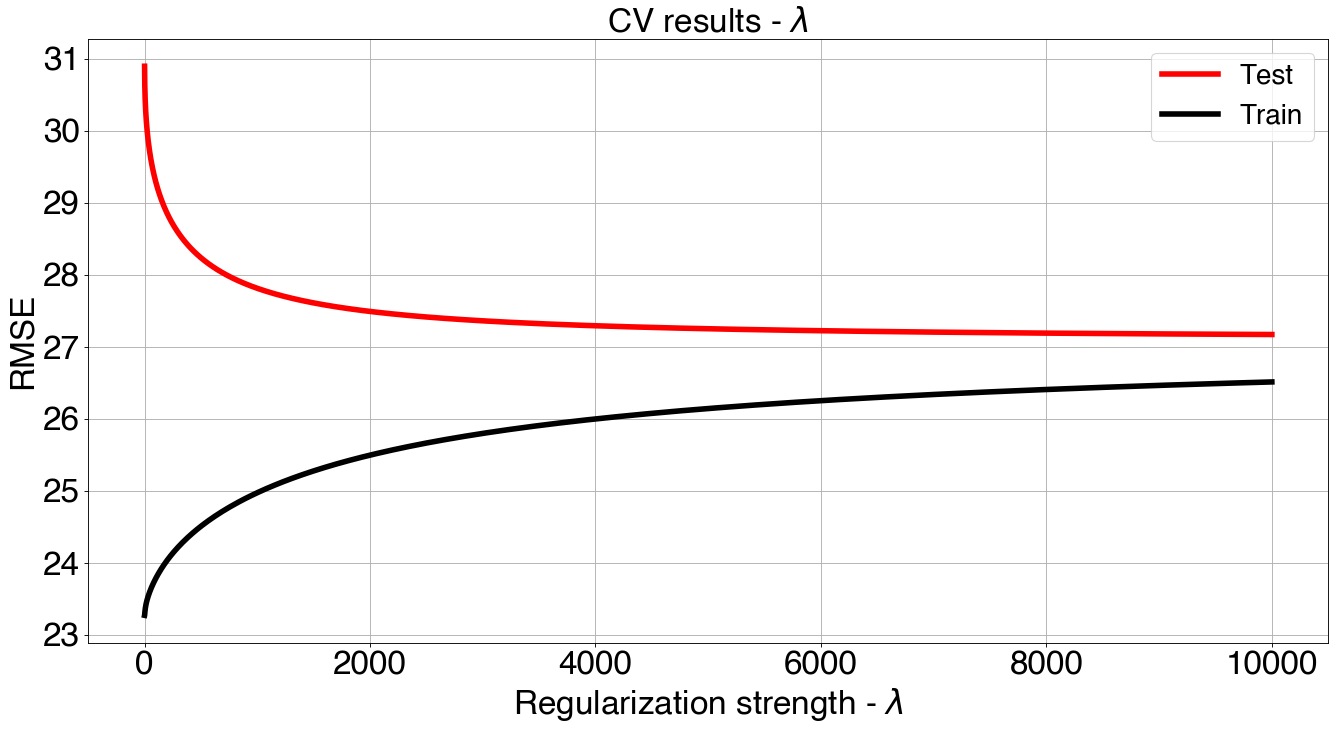

In [6]:
test_scores = -grid_search.cv_results_['mean_test_score']
train_scores = -grid_search.cv_results_['mean_train_score']

fig = plt.figure(figsize = (20,10), dpi = 80)
plt.title(r'CV results - $\lambda$', fontsize = 30)
plt.xlabel(r'Regularization strength - $\lambda$', fontsize = 30)
plt.ylabel('RMSE', fontsize = 30)
plt.plot(alphas,test_scores, label='Test', lw = 5, color = 'red')
plt.plot(alphas,train_scores, label='Train', lw = 5, color = 'black')
plt.tick_params(axis='both', which='major', labelsize=30)
plt.grid()
plt.legend(loc='best', fontsize = 25)
plt.savefig('../../figures/ridge-cv-exposures.png')
plt.show()

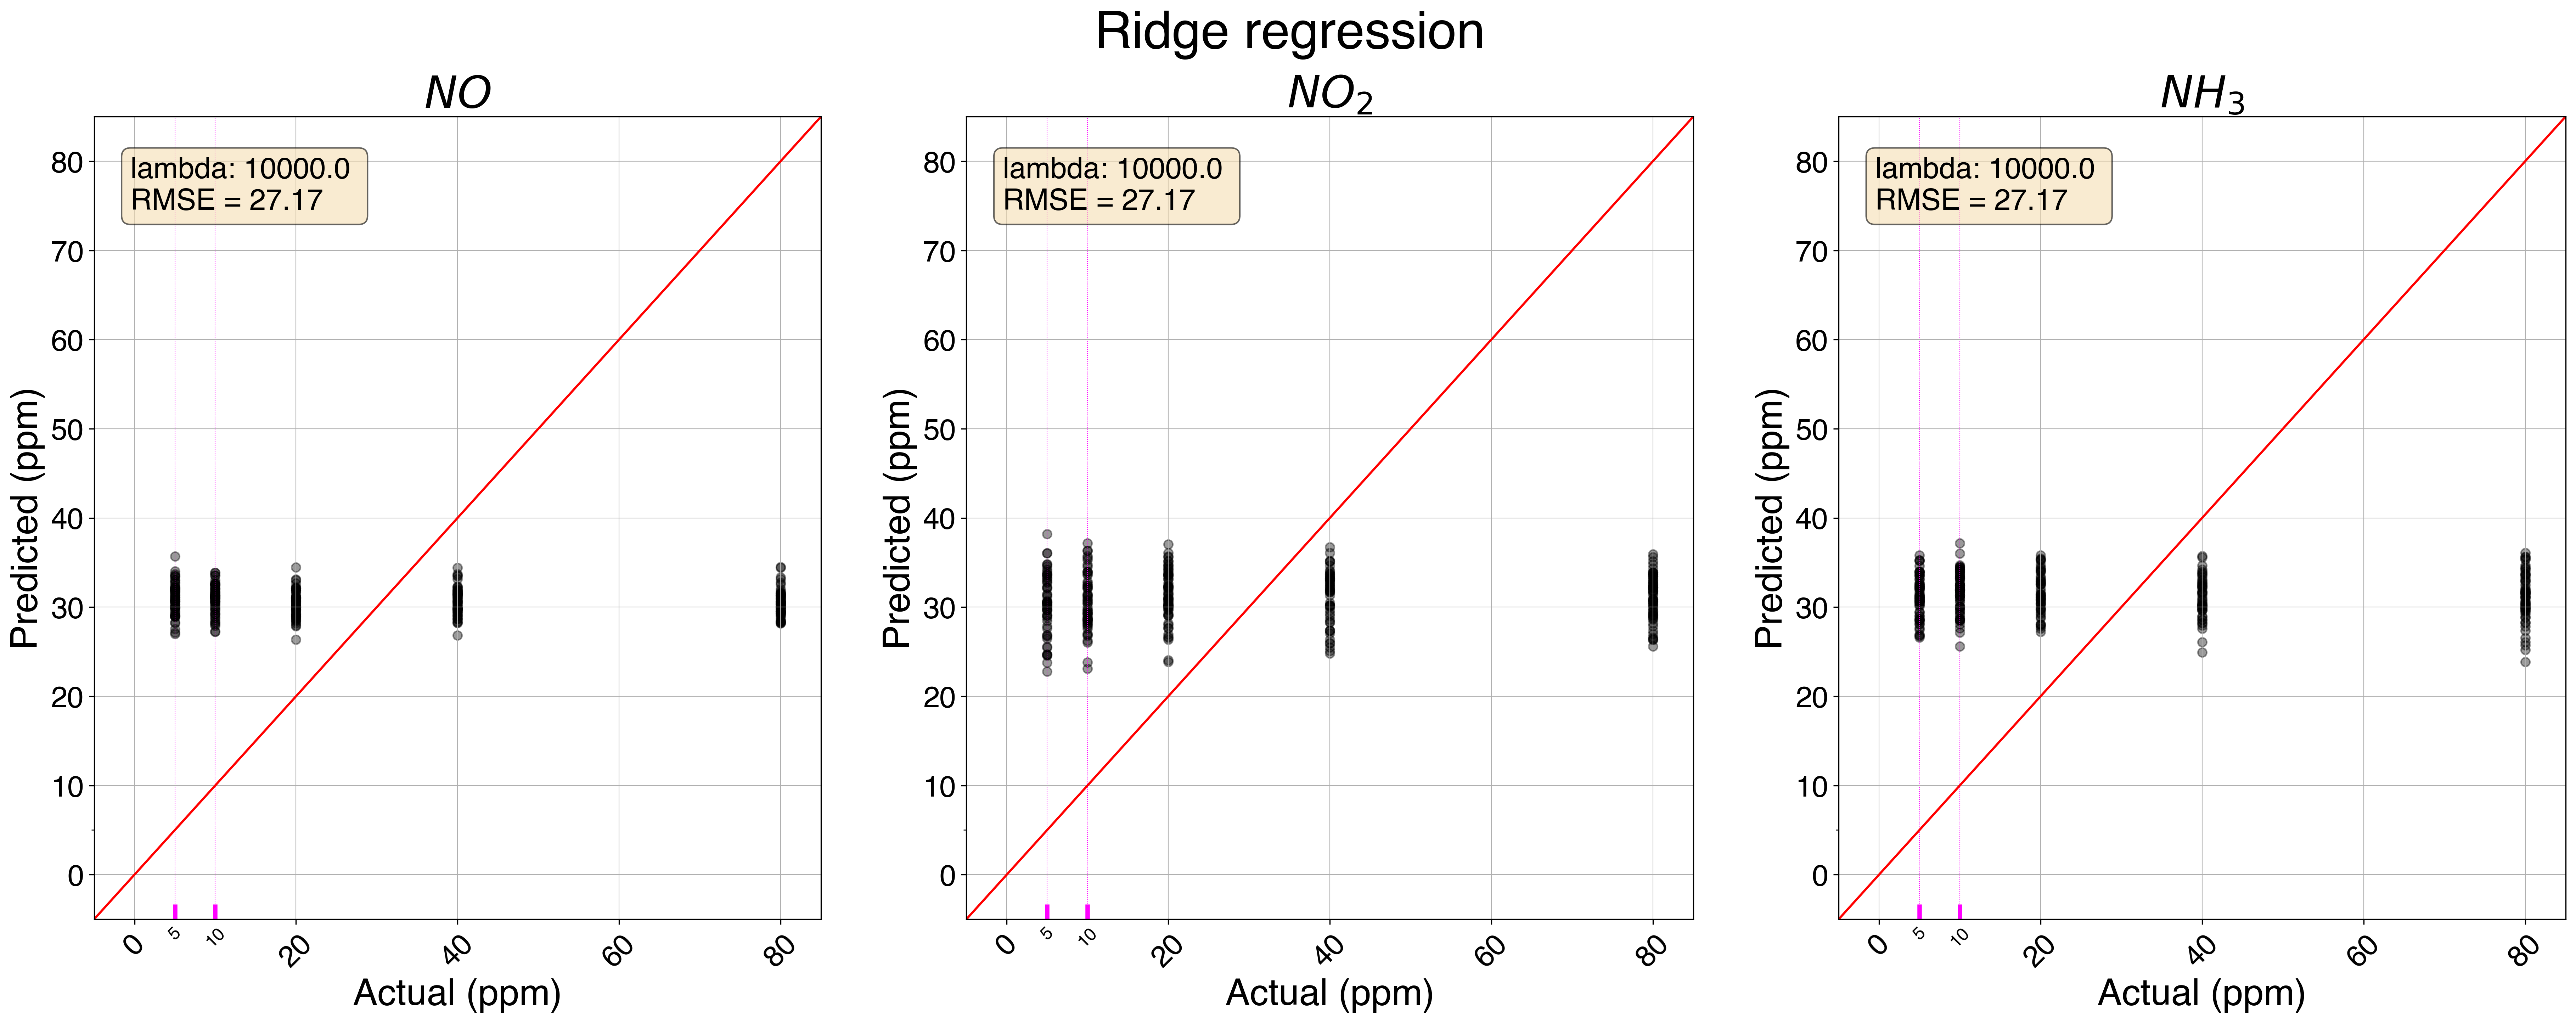

In [7]:
# Predicting on unseen validation data
Y_pred = grid_search.best_estimator_.predict(X_val)


# Plotting actual vs. predicted
#Information to display
info = f"lambda: {best_params['ridge__alpha']} \nRMSE = {round((best_score * -1), 2)}"
plot_actual_vs_pred(Y_val, Y_pred, 'Ridge regression', info)  

In [8]:
coefs = []
for a in alphas:
    ridge = Ridge(alpha=a, fit_intercept=False)
    ridge.fit(X, Y)
    coefs.append(ridge.coef_[0])

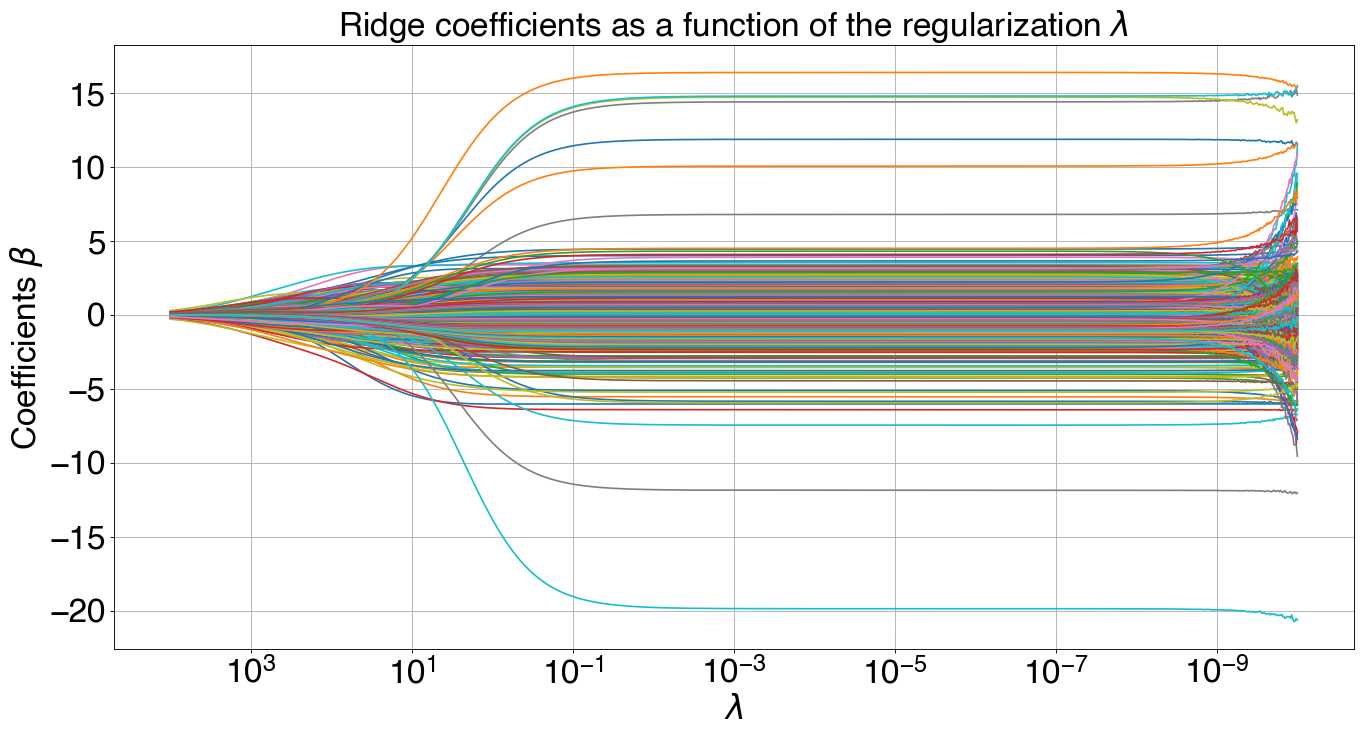

In [13]:
# # #############################################################################
# # Display results
fig = plt.figure(figsize = (20,10), dpi = 80)
ax = plt.gca()
ax.plot(alphas, coefs)
ax.set_xscale('log')
ax.set_xlim(ax.get_xlim()[::-1])  # reverse axis
plt.xlabel(r'$\lambda$', fontsize = 30)
plt.ylabel(r'Coefficients $\beta$', fontsize = 30)
plt.title(r'Ridge coefficients as a function of the regularization $\lambda$', fontsize = 30)
plt.axis('tight')
plt.tick_params(axis='both', which='major', labelsize=30)
plt.grid()
plt.show()